In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.layers import BatchNormalization, Conv2D, UpSampling2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras import regularizers
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [4]:
from tensorflow.keras import backend
backend.set_image_data_format('channels_first')

In [5]:
def get_unet():
    #concat_axis = 3 # 3 o 1
    concat_axis = 1 
    #inputs = layers.Input(shape = (80, 120, 3))
    inputs = layers.Input(shape = (3, 176, 176))
    
    #encoder
    bn0 = BatchNormalization(axis=1)(inputs)
    conv1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same', name='conv1_1')(bn0)
    bn1 = BatchNormalization(axis=1)(conv1)
    conv1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(bn1)
    bn2 = BatchNormalization(axis=1)(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(bn2)
    conv2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    bn3 = BatchNormalization(axis=1)(conv2)
    conv2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(bn3)
    bn4 = BatchNormalization(axis=1)(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(bn4)

    conv3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    bn5 = BatchNormalization(axis=1)(conv3)
    conv3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(bn5)
    bn6 = BatchNormalization(axis=1)(conv3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(bn6)

    conv4 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    bn7 = BatchNormalization(axis=1)(conv4)
    conv4 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(bn7)
    bn8 = BatchNormalization(axis=1)(conv4)
    #pool4 = layers.MaxPooling2D(pool_size=(2, 3))(bn8)
    pool4 = layers.MaxPooling2D(pool_size=(2, 2))(bn8)
    
    conv5 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    bn9 = BatchNormalization(axis=1)(conv5)
    conv5 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(bn9)
    bn10 = BatchNormalization(axis=1)(conv5)

    ##decoder
    #up_conv5 = layers.UpSampling2D(size=(2, 3))(bn10)
    up_conv5 = layers.UpSampling2D(size=(2, 2))(bn10)
    up6 = layers.concatenate([up_conv5, conv4], axis=concat_axis)
    conv6 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
    bn11 = BatchNormalization(axis=1)(conv6)
    conv6 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(bn11)
    bn12 = BatchNormalization(axis=1)(conv6)

    up_conv6 = layers.UpSampling2D(size=(2, 2))(bn12)
    up7 = layers.concatenate([up_conv6, conv3], axis=concat_axis)
    conv7 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
    bn13 = BatchNormalization(axis=1)(conv7)
    conv7 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(bn13)
    bn14 = BatchNormalization(axis=1)(conv7)

    up_conv7 = layers.UpSampling2D(size=(2, 2))(bn14)
    up8 = layers.concatenate([up_conv7, conv2], axis=concat_axis)
    conv8 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
    bn15 = BatchNormalization(axis=1)(conv8)
    conv8 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(bn15)
    bn16 = BatchNormalization(axis=1)(conv8)

    up_conv8 = layers.UpSampling2D(size=(2, 2))(bn16)
    up9 = layers.concatenate([up_conv8, conv1], axis=concat_axis)
    conv9 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
    bn17 = BatchNormalization(axis=1)(conv9)
    conv9 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(bn17)
    bn18 = BatchNormalization(axis=1)(conv9)

    conv10 = layers.Conv2D(1, (1, 1))(bn18)
    #bn19 = BatchNormalization(axis=1)(conv10)

    model = models.Model(inputs=inputs, outputs=conv10)

    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='mae', optimizer=sgd, metrics=['mse'])
    #model.compile(loss='mae', optimizer=Adam(lr=0.001), metrics=['mse'])
    print(model.summary())

    return model

In [6]:
model = get_unet()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 3, 176, 176) 0                                            
__________________________________________________________________________________________________
batch_normalization_5 (BatchNor (None, 3, 176, 176)  12          input_2[0][0]                    
__________________________________________________________________________________________________
conv1_1 (Conv2D)                (None, 32, 176, 176) 896         batch_normalization_5[0][0]      
__________________________________________________________________________________________________
batch_normalization_6 (BatchNor (None, 32, 176, 176) 128         conv1_1[0][0]                    
______________________________________________________________________________________________

In [7]:
## X:
X_train = np.load("/opt/datos/dataset/sin_normalizar/X_train.npy")
X_val   = np.load("/opt/datos/dataset/sin_normalizar/X_val.npy")

print(X_train.shape)
print(X_val.shape)

## Y:
Y_train = np.load("/opt/datos/dataset/milimetros/Y_train.npy")
Y_val   = np.load("/opt/datos/dataset/milimetros/Y_val.npy")

print(Y_train.shape)
print(Y_val.shape)

(8350, 3, 176, 176)
(1789, 3, 176, 176)
(8350, 176, 176)
(1789, 176, 176)


In [8]:
Y_train = np.expand_dims(Y_train, axis=1)
Y_val = np.expand_dims(Y_val, axis=1)

print(Y_train.shape)
print(Y_val.shape)

(8350, 1, 176, 176)
(1789, 1, 176, 176)


In [9]:
history = model.fit(X_train, Y_train, epochs=50, verbose=1, validation_data=(X_val, Y_val))

Epoch 1/50
261/261 [==============================] - 357s 1s/step - loss: 0.3305 - mse: 3.7289 - val_loss: 0.1454 - val_mse: 1.3101
Epoch 2/50
261/261 [==============================] - 166s 637ms/step - loss: 0.2212 - mse: 3.8009 - val_loss: 0.1143 - val_mse: 1.3158
Epoch 3/50
261/261 [==============================] - 166s 637ms/step - loss: 0.1973 - mse: 3.2312 - val_loss: 0.1042 - val_mse: 1.3179
Epoch 4/50
261/261 [==============================] - 166s 637ms/step - loss: 0.2118 - mse: 3.5468 - val_loss: 0.1024 - val_mse: 1.3172
Epoch 5/50
261/261 [==============================] - 166s 637ms/step - loss: 0.1955 - mse: 3.2585 - val_loss: 0.1043 - val_mse: 1.3151
Epoch 6/50
261/261 [==============================] - 166s 637ms/step - loss: 0.2143 - mse: 3.7739 - val_loss: 0.1076 - val_mse: 1.3151
Epoch 7/50
261/261 [==============================] - 166s 637ms/step - loss: 0.2126 - mse: 3.6403 - val_loss: 0.1070 - val_mse: 1.3201
Epoch 8/50
261/261 [==============================]

In [10]:
with open('/opt/datos/entrenamientos/trainHistoryDict_unet__mm_No_normalized', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

In [11]:
history = pickle.load( open( "/opt/datos/entrenamientos/trainHistoryDict_unet__mm_No_normalized", "rb" ) )

In [12]:
import matplotlib.pyplot as plt

~ Unet Dataset 2017-2021 ~
val_loss: 0.10417693853378296
loss: 0.21365635097026825


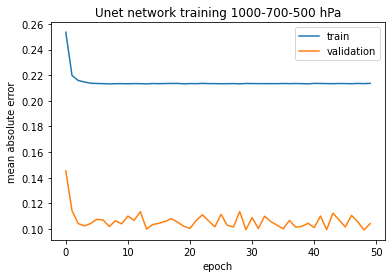

In [13]:
print("~ Unet Dataset 2017-2021 ~")
print(f"val_loss: {history['val_loss'][-1]}")
print(f"loss: {history['loss'][-1]}")
#print(history)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Unet network training 1000-700-500 hPa')
plt.ylabel('mean absolute error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [14]:
model.save('/opt/datos/entrenamientos/unet_mm_No_normalized.h5')